In [1]:
import scipy.io
import numpy as np
import pandas as pd
import os
from shutil import copy2
from datetime import datetime, timedelta

In [ ]:
type_list = ['train', 'val', 'test']

for sub_dir in type_list:
    for i in range(0, 101):
        path = 'age_dataset/' + sub_dir + '/' + str(i)
        print(path)
        os.makedirs(path)
    for i in range(0, 2):
        path = 'gender_dataset/' + sub_dir + '/' + str(i)
        print(path)
        os.makedirs(path)

In [2]:
mat = scipy.io.loadmat('wiki_crop/wiki.mat')

instances = mat['wiki'][0][0][0].shape[1]
 
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]
 
df = pd.DataFrame(index = range(0,instances), columns = columns)
 
for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]
        for j in range(len(current_array)):
            df[columns[j]] = pd.DataFrame(current_array[j][0])
            
df.head(10)

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,[Krista Tippett],"[[274.76563240288175, 57.7700900839337, 376.88...",4.748056,NaN
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,[Bernie Whitebear],"[[79.35580188693945, 26.65993396231315, 197.60...",4.184828,NaN
7,695763,1982,[39/100039_1904-12-07_1982.jpg],1.0,[Clarence Nash],"[[152.9073113210374, 95.90456957564838, 323.01...",3.006350,1.103340
8,711000,2007,[13/10004113_1946-08-26_2007.jpg],1.0,[William W. Destler],"[[1, 1, 1, 1]]",-inf,NaN
9,723987,2011,[22/10004122_1982-03-17_2011.jpg],1.0,[Daniel Smith],"[[1, 1, 592, 440]]",-inf,NaN


In [3]:
def datenum_to_datetime(datenum):
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    exact_date = datetime.fromordinal(int(datenum)) \
    + timedelta(days=int(days)) + timedelta(hours=int(hours)) \
    + timedelta(minutes=int(minutes)) + timedelta(seconds=round(seconds)) \
    - timedelta(days=366)
 
    return exact_date.year
 
df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)
df['age'] = df['photo_taken'] - df['date_of_birth']
df.head(10)

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth,age
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,1981,28
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,1925,39
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,1948,60
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,1930,31
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,1971,41
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,[Krista Tippett],"[[274.76563240288175, 57.7700900839337, 376.88...",4.748056,NaN,1960,52
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,[Bernie Whitebear],"[[79.35580188693945, 26.65993396231315, 197.60...",4.184828,NaN,1937,34
7,695763,1982,[39/100039_1904-12-07_1982.jpg],1.0,[Clarence Nash],"[[152.9073113210374, 95.90456957564838, 323.01...",3.006350,1.103340,1904,78
8,711000,2007,[13/10004113_1946-08-26_2007.jpg],1.0,[William W. Destler],"[[1, 1, 1, 1]]",-inf,NaN,1946,61
9,723987,2011,[22/10004122_1982-03-17_2011.jpg],1.0,[Daniel Smith],"[[1, 1, 592, 440]]",-inf,NaN,1982,29


In [4]:
#remove pictures does not include face
df = df[df['face_score'] != -np.inf]
 
#some pictures include more than one face, remove them
df = df[df['second_face_score'].isna()]
 
#check threshold
df = df[df['face_score'] >= 3]
 
#some records do not have a gender information
df = df[~df['gender'].isna()]

#some guys seem to be greater than 100. some of these are paintings. remove these old guys
df = df[df['age'] <= 100]
 
#some guys seem to be unborn in the data set
df = df[df['age'] > 0]
 
df = df.drop(columns = ['name','face_score','second_face_score','date_of_birth','face_location'])

df.head(10)

,dob,photo_taken,full_path,gender,age
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34
10,697114,1950,[99/10004299_1908-08-19_1950.jpg],1.0,42
11,706177,1969,[56/1000456_1933-06-12_1969.jpg],1.0,36
12,725873,2010,[82/10004882_1987-05-16_2010.jpg],1.0,23
15,723643,2006,[47/10005947_1981-04-07_2006.jpg],0.0,25
17,720853,2010,[50/10006850_1973-08-17_2010.jpg],1.0,37


In [5]:
len(df)

22138

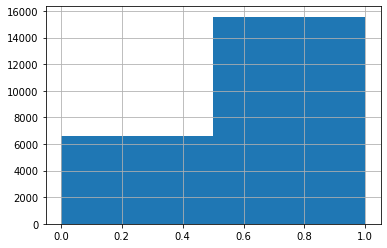

In [6]:
histogram_gender = df['gender'].hist(bins=df['gender'].nunique())

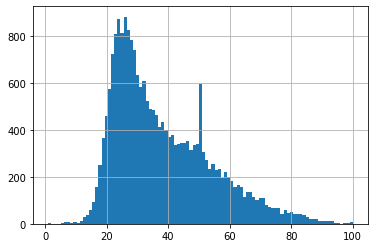

In [7]:
histogram_age = df['age'].hist(bins=df['age'].nunique())

In [8]:
def copyToDir(src, model_type, sub_dir, no_class):
    if model_type == 'age':
        par_dir = 'age_dataset'
        dst = par_dir + '/' + sub_dir + '/' + str(no_class)
    else: 
        par_dir = 'gender_dataset'
        dst = par_dir + '/' + sub_dir + '/' + str(no_class)
    
#     print(dst)
    copy2(src, dst)

In [9]:
train_per = 0.8
test_per = 0.3
val_per = 0.1

train_size = int(train_per*len(df))
test_size = int(test_per*len(df))
val_size = int(val_per*train_size)

print(train_size, val_size, test_size)

17710 3542 4427


In [10]:
train_df = df[:train_size]
print(len(train_df))
test_df = df[-test_size:]
print(len(test_df))
val_df = train_df[-val_size:]
train_df = train_df[:train_size-val_size]
print(len(train_df))

17710
4427
14168


In [11]:
for index, row in train_df.iterrows():
    src = "wiki_crop/" + row['full_path'][0]
    age = row['age']
    gender = row['gender']
#     copyToDir(src, 'age', 'train', age)
    copyToDir(src, 'gender', 'train', gender)

In [12]:
for index, row in val_df.iterrows():
    src = "wiki_crop/" + row['full_path'][0]
    age = row['age']
    gender = row['gender']
#     copyToDir(src, 'age', 'val', age)
    copyToDir(src, 'gender', 'val', gender)

In [13]:
for index, row in test_df.iterrows():
    src = "wiki_crop/" + row['full_path'][0]
    age = row['age']
    gender = row['gender']
#     copyToDir(src, 'age', 'test', age)
    copyToDir(src, 'gender', 'test', gender)